In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df=pd.read_csv("fifa21_male2.csv")

C:\Users\roriv\AppData\Local\Temp\ipykernel_39252\2536338427.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("fifa21_male2.csv")


In [4]:
df1=df.copy()

In [7]:
df1

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [136]:
df_hipotesis=df1[['Age', 'OVA', 'Nationality', 'Long Passing', 'Ball Control', 'Movement','Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',	'Sliding Tackle',	'Goalkeeping']]

In [137]:
df_hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              17125 non-null  int64  
 1   OVA              17125 non-null  int64  
 2   Nationality      17125 non-null  object 
 3   Long Passing     17125 non-null  int64  
 4   Ball Control     17125 non-null  int64  
 5   Movement         17125 non-null  int64  
 6   Acceleration     17125 non-null  int64  
 7   Sprint Speed     17125 non-null  int64  
 8   Agility          17067 non-null  float64
 9   Reactions        17125 non-null  int64  
 10  Balance          17067 non-null  float64
 11  Power            17125 non-null  int64  
 12  Shot Power       17125 non-null  int64  
 13  Jumping          17067 non-null  float64
 14  Stamina          17125 non-null  int64  
 15  Strength         17125 non-null  int64  
 16  Long Shots       17125 non-null  int64  
 17  Mentality   

In [22]:
# voy a separar columnas numericas y categoricas para trabajarlas. 

In [138]:
numerical = df_hipotesis.select_dtypes(include=np.number)
categorical = df_hipotesis.select_dtypes(include=object)

Categoricas.

In [35]:
#Aqui se plantea un problema, los valores de la columna nacionalidad son muchos, y esto puede generar demasiadas columnas si hago variables dummies. 
unique_values=categorical['Nationality'].unique()
print(unique_values)

['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Tunisia'
 'Bulgaria' 'Poland' 'United States' 'Mali' 'Finland' 'Iceland'
 'Czech Republic' 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel'
 'Cameroon' 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Austria' 'Algeria'
 'Morocco' 'Albania' 'North Macedonia' 'Slovenia' 'Madagascar' 'Croatia'
 'Kosovo' 'Estonia' 'Moldova' 'Bosnia Herzegovina' 'Russia' 'Romania'
 'DR Congo' 'Antigua &amp; Barbuda' 'Burkina Faso' 'Panama' 'Gibraltar'
 'Venezuela' 'Benin' 'Cyprus' 'Iran' 'Haiti' 'Slovakia' 'Ecuador'
 'Saudi Arabia' 'Guinea' 'New Zealand' 'Latvia' 'Honduras' 'Gabon' 'Kenya'
 'Angola

In [53]:
#Voy a simplificar las variables naciones en continentes. 
continentes = continentes = {'Italy': 'Europa', 'Spain': 'Europa', 'England': 'Europa', 'Trinidad &amp; Tobago': 'América', 'Germany': 'Europa', 'Turkey': 'Europa', 'Wales': 'Europa', 'Republic of Ireland': 'Europa', 'Nigeria': 'África', 'Brazil': 'América', 'Australia': 'Oceanía', 'Hungary': 'Europa', 'Argentina': 'América', 'Portugal': 'Europa', 'Netherlands': 'Europa', 'France': 'Europa', 'Norway': 'Europa', 'Tunisia': 'África', 'Bulgaria': 'Europa', 'Poland': 'Europa', 'United States': 'América', 'Mali': 'África', 'Finland': 'Europa', 'Iceland': 'Europa', 'Czech Republic': 'Europa', 'Serbia': 'Europa', 'Sweden': 'Europa', 'Georgia': 'Europa', 'Denmark': 'Europa', 'Senegal': 'África', 'Israel': 'Asia', 'Cameroon': 'África', 'Greece': 'Europa', 'Scotland': 'Europa', 'Ukraine': 'Europa', 'China PR': 'Asia', 'Colombia': 'América', 'Belgium': 'Europa', 'Ivory Coast': 'Europa', 'Switzerland': 'Europa', 'Canada': 'América', 'Chile': 'América', 'Peru': 'América', 'Paraguay': 'América', 'Mexico': 'América', 'Japan': 'América', 'Ghana': 'África', 'Korea Republic': 'África', 'Belarus': 'Europa', 'Egypt': 'África', 'Congo': 'África', 'Uruguay': 'América', 'South Africa': 'África', 'Northern Ireland': 'Europa', 'Togo': 'África', 'Jamaica': 'América', 'Austria': 'Europa', 'Algeria': 'África', 'Morocco': 'África', 'Albania': 'Europa', 'North Macedonia': 'Europa', 'Slovenia': 'Europa', 'Madagascar': 'África', 'Croatia': 'Europa', 'Kosovo': 'Europa', 'Estonia': 'Europa', 'Moldova': 'Europa', 'Bosnia Herzegovina': 'Europa', 'Russia': 'Europa', 'Romania': 'Europa', 'DR Congo': 'África', 'Antigua &amp; Barbuda': 'América', 'Burkina Faso': 'África', 'Panama': 'América', 'Gibraltar': 'Europa', 'Venezuela': 'América', 'Benin': 'África', 'Cyprus': 'Europa', 'Iran': 'Asia', 'Haiti': 'América', 'Slovakia': 'Europa', 'Ecuador': 'América', 'Saudi Arabia': 'Asia', 'Guinea': 'África', 'New Zealand': 'Oceanía', 'Latvia': 'Europa', 'Honduras': 'América', 'Gabon': 'África', 'Kenya': 'África', 'Angola': 'África', 'Bolivia': 'América', 'Costa Rica': 'América', 'Sierra Leone': 'África', 'Lithuania': 'Europa', 'Cape Verde': 'África', 'Montenegro': 'Europa', 'Korea DPR': 'Europa', 'Gambia': 'África', 'Uzbekistan': 'Europa', 'Comoros': 'África', 'Kazakhstan': 'Europa', 'Aruba': 'Europa', 'Guyana': 'América', 'Curacao': 'América', 'Zimbabwe': 'Europa', 'Zambia': 'Europa', 'Montserrat': 'Europa', 'Guam': 'América', 'India': 'Europa', 'Cuba': 'América', 'Saint Kitts and Nevis': 'América', 'Armenia': 'Europa', 'Andorra': 'Europa', 'Philippines': 'Europa', 'Liechtenstein': 'Europa', 'Thailand': 'Europa', 'Guinea Bissau': 'África', 'Jordan': 'Europa', 'Faroe Islands': 'Europa', 'Mozambique': 'Europa', 'United Arab Emirates': 'Europa', 'New Caledonia': 'Oceanía', 'Equatorial Guinea': 'África', 'Iraq': 'Asia', 'Barbados': 'América', 'Suriname': 'América', 'Central African Republic': 'África', 'Puerto Rico': 'América', 'Bermuda': 'Europa', 'Libya': 'África', 'Grenada': 'América', 'Burundi': 'África', 'São Tomé &amp; Príncipe': 'Europa', 'Luxembourg': 'Europa', 'Eritrea': 'África', 'Chinese Taipei': 'Europa', 'Malta': 'Europa', 'Uganda': 'África', 'Saint Lucia': 'América', 'Malaysia': 'Europa', 'Lebanon': 'Europa', 'Namibia': 'África', 'Azerbaijan': 'Europa', 'El Salvador': 'América', 'Singapore': 'Europa', 'Tanzania': 'África', 'Malawi': 'África', 'Liberia': 'África', 'Dominican Republic': 'América', 'Syria': 'Asia', 'Afghanistan': 'Asia', 'Mauritania': 'África', 'Chad': 'África', 'South Sudan': 'África', 'Belize': 'América', 'Papua New Guinea': 'Oceanía', 'Qatar': 'Asia', 'Brunei Darussalam': 'Asia', 'Vietnam': 'Asia', 'Nicaragua': 'América', 'Sudan': 'África', 'Hong Kong': 'Asia', 'Palestine': 'Asia', 'Rwanda': 'África', 'Indonesia': 'Asia', 'Macau': 'Asia', 'Niger': 'África'}

categorical['Continente'] = categorical['Nationality'].map(continentes)
print(categorical)

                 Nationality Continente
0                      Italy     Europa
1                      Spain     Europa
2                    England     Europa
3      Trinidad &amp; Tobago    América
4                      Spain     Europa
...                      ...        ...
17120                 France     Europa
17121                  Wales     Europa
17122                England     Europa
17123     Bosnia Herzegovina     Europa
17124                  Spain     Europa

[17125 rows x 2 columns]


In [106]:
categorical_cont=categorical.drop(['Nationality'], axis=1)
categorical_cont.Continente.value_counts()

Europa     10877
América     4378
África      1381
Asia         301
Oceanía      188
Name: Continente, dtype: int64

In [104]:
# ERROR EN LA FORMULA, ME QUITA UN CONTINENTE
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical_cont)
encoded = encoder.transform(categorical_cont).toarray()
feature_names = encoder.get_feature_names_out(categorical_cont.columns)
X_cat_encoded = pd.DataFrame(encoded, columns=feature_names)
df_encod = categorical_cont.drop(categorical_cont.columns, axis=1)
cat_cont_encod = pd.concat([df_encod, X_cat_encoded], axis=1)
cat_cont_encod

,Continente_Asia,Continente_Europa,Continente_Oceanía,Continente_África
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
17120,0.0,1.0,0.0,0.0
17121,0.0,1.0,0.0,0.0
17122,0.0,1.0,0.0,0.0
17123,0.0,1.0,0.0,0.0


In [109]:
# FORMULA DE CHAT GPT PARA HACER DUMMIES.
# Obtener variables dummies
dummies = pd.get_dummies(categorical_cont['Continente'], prefix='Continente')

# Concatenar las variables dummies al DataFrame original
categorical_encoded = pd.concat([categorical_cont, dummies], axis=1)

# Mostrar el DataFrame resultante
categorical_encoded

,Continente,Continente_América,Continente_Asia,Continente_Europa,Continente_Oceanía,Continente_África
0,Europa,0,0,1,0,0
1,Europa,0,0,1,0,0
2,Europa,0,0,1,0,0
3,América,1,0,0,0,0
4,Europa,0,0,1,0,0
...,...,...,...,...,...,...
17120,Europa,0,0,1,0,0
17121,Europa,0,0,1,0,0
17122,Europa,0,0,1,0,0
17123,Europa,0,0,1,0,0


Numericas

In [139]:
# cumplimnetamos la media de las columnas
column_means = numerical.mean()
numerical_filled = numerical.fillna(column_means)

In [140]:
numerical_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              17125 non-null  int64  
 1   OVA              17125 non-null  int64  
 2   Long Passing     17125 non-null  int64  
 3   Ball Control     17125 non-null  int64  
 4   Movement         17125 non-null  int64  
 5   Acceleration     17125 non-null  int64  
 6   Sprint Speed     17125 non-null  int64  
 7   Agility          17125 non-null  float64
 8   Reactions        17125 non-null  int64  
 9   Balance          17125 non-null  float64
 10  Power            17125 non-null  int64  
 11  Shot Power       17125 non-null  int64  
 12  Jumping          17125 non-null  float64
 13  Stamina          17125 non-null  int64  
 14  Strength         17125 non-null  int64  
 15  Long Shots       17125 non-null  int64  
 16  Mentality        17125 non-null  int64  
 17  Aggression  

#Boxplot de las columnas numericas.

fig, axes = plt.subplots(len(numerical_filled.columns), 1, figsize=(4, 2* len(numerical_filled.columns)))

for i, column in enumerate(numerical_filled.columns):
    sns.boxplot(numerical_filled[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show() 

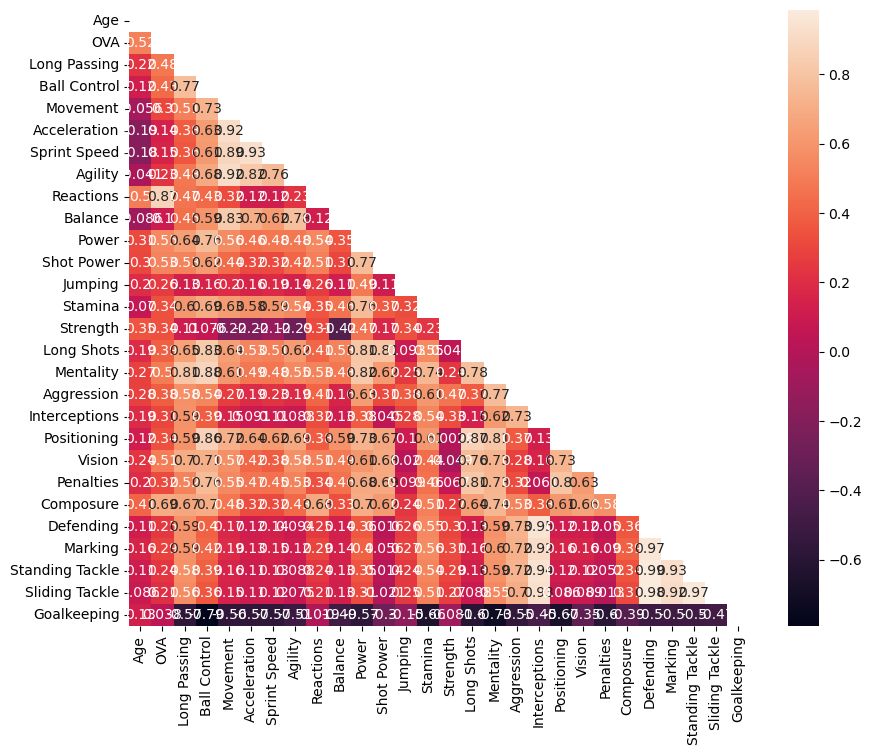

In [141]:
#miro si hay algunas variables con problema de colinealidad. 

correlations_matrix = numerical_filled.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [142]:
#normalizo variables numericas.

transformer=StandardScaler().fit(numerical_filled)
x_normalized=transformer.transform(numerical_filled)
numerical_filled_norm=pd.DataFrame(x_normalized)
numerical_filled_norm

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.563385,0.296466,0.987830,0.652497,0.442481,0.174253,0.592712,0.236814,0.672252,0.234477,...,1.051463,0.556692,7.701796e-01,-0.016020,6.122874e-16,1.080150,1.127396,0.964515,1.082826,-0.266345
1,2.372689,0.587835,1.122452,0.652497,-0.322101,-0.644443,-1.069688,-0.181373,0.229628,0.520041,...,1.147424,1.028144,1.280890e+00,1.576752,1.642351e+00,0.187197,1.127396,-0.245746,-0.288422,-0.266345
2,1.563385,0.587835,0.987830,1.093492,-0.504145,-1.190240,-1.623821,0.445907,-0.434308,0.734214,...,-0.387950,0.870993,1.353848e+00,1.003354,6.122874e-16,-0.689520,-0.606827,-0.664683,-0.761266,-0.327971
3,2.170363,0.150781,0.651277,1.030493,-2.670460,-0.439769,-0.238488,0.000000,-0.876932,0.000000,...,1.099443,1.028144,-5.184019e-16,1.258198,6.122874e-16,-1.079173,-0.656376,-0.338843,0.000000,-0.118442
4,2.170363,2.044685,1.930180,1.849484,0.424276,-0.303320,-0.654088,1.003489,1.336188,0.734214,...,1.099443,1.342445,2.740061e+00,1.321909,2.504069e+00,0.641791,1.028297,0.405933,0.468128,-0.401923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,-0.662199,-0.431959,-1.368044,-0.292493,-1.450770,-0.917342,-0.723355,-1.296537,-1.651524,-1.621688,...,0.523678,-1.538649,-1.929288e+00,-0.716840,-1.201318e+00,0.917795,0.681453,1.057612,0.940972,-0.475874
17121,-1.471503,-1.597438,0.449345,-0.418492,-0.449532,-0.303320,-0.169221,-0.878350,-0.987588,0.234477,...,0.139835,0.137624,-1.782819e-01,-0.016020,-1.201318e+00,-0.153749,-0.656376,-0.292295,0.468128,-0.254020
17122,-1.471503,-1.597438,-1.233423,-0.859488,-0.267488,0.037803,-0.307754,-0.738955,-0.434308,0.234477,...,0.379737,-0.176677,-7.619505e-01,-0.079731,-1.459833e+00,0.349552,0.384158,0.266287,0.373560,-0.463549
17123,-1.066851,-0.723329,0.180102,-0.229494,0.478889,0.447151,0.315646,0.655001,-0.766276,0.876996,...,0.523678,-0.333828,4.059382e-02,-0.907972,-5.119436e-01,0.625556,0.483256,0.638675,0.704550,-0.327971


Y=numerical_filled['Age']
X=numerical_filled.drop('Age', axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

In [146]:
# Cambio de nombre las columnas. y cambio a mayusculas y reemplazo espacios por guiones. 
col_num=numerical_filled.columns
numerical_filled_norm.columns=col_num
numerical_filled_norm.columns=numerical_filled_norm.columns.str.upper().str.replace(' ','_')
numerical_filled_norm1=numerical_filled_norm.copy()

In [152]:
#agrego la variable OVA que es Overall. 
Y=numerical_filled_norm1['OVA']
X=numerical_filled_norm1.drop(['OVA'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OVA   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     4374.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:40:55   Log-Likelihood:                -7166.9
No. Observations:               17125   AIC:                         1.439e+04
Df Residuals:                   17099   BIC:                         1.459e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.665e-16      0.003  -5.

In [150]:
numerical_filled.Age.value_counts()

22    1322
23    1307
21    1267
20    1255
24    1227
25    1109
26    1087
28    1033
27    1026
19    1012
29     872
30     769
31     669
18     662
32     575
33     505
34     394
17     288
35     262
36     174
37     111
38      73
16      45
39      39
40      21
42       9
41       8
43       2
47       1
53       1
Name: Age, dtype: int64

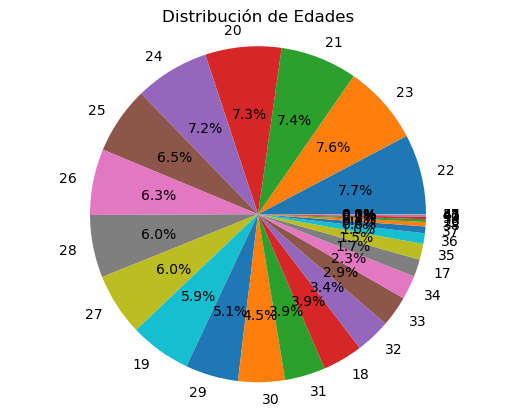

In [183]:
import matplotlib.pyplot as plt

# Datos de edad y frecuencia
edades = [22, 23, 21, 20, 24, 25, 26, 28, 27, 19, 29, 30, 31, 18, 32, 33, 34, 17, 35, 36, 37, 38, 16, 39, 40, 42, 41, 43, 47, 53]
frecuencias = [1322, 1307, 1267, 1255, 1227, 1109, 1087, 1033, 1026, 1012, 872, 769, 669, 662, 575, 505, 394, 288, 262, 174, 111, 73, 45, 39, 21, 9, 8, 2, 1, 1]

# Crear gráfico de pastel
plt.pie(frecuencias, labels=edades, autopct='%1.1f%%')
plt.title('Distribución de Edades')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

In [153]:
#regresion lineal con OVA
Y = numerical_filled_norm1['OVA']
X = numerical_filled_norm1.drop(['OVA'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()

# Obtener los coeficientes y ordenarlos de menor a mayor
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.params})
coef_df_sorted = coef_df.sort_values(by='Coeficiente')

# Mostrar el resumen del modelo con los coeficientes ordenados
print(coef_df_sorted)
print(summary)

                        Variable   Coeficiente
MENTALITY              MENTALITY -4.511602e-01
LONG_SHOTS            LONG_SHOTS -9.691152e-02
BALANCE                  BALANCE -8.390916e-02
AGILITY                  AGILITY -6.287942e-02
SLIDING_TACKLE    SLIDING_TACKLE -8.666729e-03
const                      const -1.665335e-16
JUMPING                  JUMPING  4.506190e-03
STAMINA                  STAMINA  5.633371e-03
ACCELERATION        ACCELERATION  2.875418e-02
LONG_PASSING        LONG_PASSING  3.447788e-02
VISION                    VISION  4.804742e-02
POWER                      POWER  4.937860e-02
STANDING_TACKLE  STANDING_TACKLE  5.045019e-02
AGE                          AGE  5.442100e-02
SPRINT_SPEED        SPRINT_SPEED  5.687160e-02
DEFENDING              DEFENDING  6.335973e-02
STRENGTH                STRENGTH  6.525646e-02
POSITIONING          POSITIONING  6.628790e-02
MARKING                  MARKING  6.891606e-02
SHOT_POWER            SHOT_POWER  7.768784e-02
INTERCEPTIONS

In [179]:
Y=numerical_filled_norm1['OVA']
X=numerical_filled_norm1.drop(['OVA'] , axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.8618173143332882

Una vez determinado cuales son las variables (habilidades) que mas afectar a la OVA son Ball control, reactions, mentalidad, goalkeeping. 

In [155]:
# Reactions OLS
Y = numerical_filled_norm1['REACTIONS']
X = numerical_filled_norm1.drop(['REACTIONS'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()

# Obtener los coeficientes y ordenarlos de menor a mayor
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.params})
coef_df_sorted = coef_df.sort_values(by='Coeficiente')

# Mostrar el resumen del modelo con los coeficientes ordenados
print(coef_df_sorted)
print(summary)

                        Variable   Coeficiente
POWER                      POWER -8.065207e+00
DEFENDING              DEFENDING -4.897303e+00
ACCELERATION        ACCELERATION -1.621936e+00
SPRINT_SPEED        SPRINT_SPEED -1.597536e+00
AGILITY                  AGILITY -1.587655e+00
BALANCE                  BALANCE -1.550000e+00
BALL_CONTROL        BALL_CONTROL -4.454770e-15
AGGRESSION            AGGRESSION -4.080070e-15
PENALTIES              PENALTIES -3.943894e-15
POSITIONING          POSITIONING -1.793704e-15
GOALKEEPING          GOALKEEPING -7.077672e-16
AGE                          AGE -1.942890e-16
VISION                    VISION -3.122502e-17
INTERCEPTIONS      INTERCEPTIONS  5.828671e-16
LONG_PASSING        LONG_PASSING  7.580742e-16
OVA                          OVA  9.575674e-16
COMPOSURE              COMPOSURE  2.652392e-15
const                      const  5.162537e-15
MENTALITY              MENTALITY  8.437695e-15
MARKING                  MARKING  1.604672e+00
SLIDING_TACKL

In [164]:
# voy a analizar como esta afectada las habilidades mas relevantes en función de la edad 
Y=numerical_filled_norm1['BALL_CONTROL']
X=numerical_filled_norm1.drop(['BALL_CONTROL'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           BALL_CONTROL   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     9244.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:19:08   Log-Likelihood:                -1392.7
No. Observations:               17125   AIC:                             2837.
Df Residuals:                   17099   BIC:                             3039.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.274e-16      0.002  -2.

In [175]:
Y=numerical_filled_norm1['COMPOSURE']
X=numerical_filled_norm1.drop(['COMPOSURE'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              COMPOSURE   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1815.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:52:31   Log-Likelihood:                -13205.
No. Observations:               17125   AIC:                         2.646e+04
Df Residuals:                   17099   BIC:                         2.666e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.608e-16      0.004  -9.

In [174]:
Y=numerical_filled_norm1['GOALKEEPING']
X=numerical_filled_norm1.drop(['GOALKEEPING'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            GOALKEEPING   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     6989.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:24:42   Log-Likelihood:                -3598.5
No. Observations:               17125   AIC:                             7249.
Df Residuals:                   17099   BIC:                             7451.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.012e-16      0.002   8.

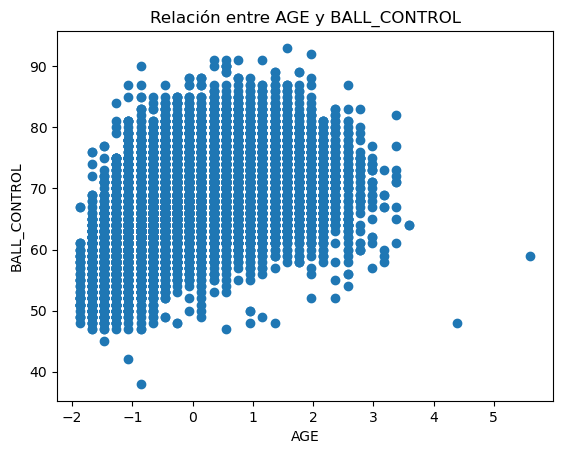

In [177]:
age = numerical_filled_norm1['AGE']
BALLCONTROL = numerical_filled_norm1['BALL_CONTROL']

# Graficar AGE vs OVA
plt.scatter(age, ova)
plt.xlabel('AGE')
plt.ylabel('BALL_CONTROL')
plt.title('Relación entre AGE y BALL_CONTROL')
plt.show()

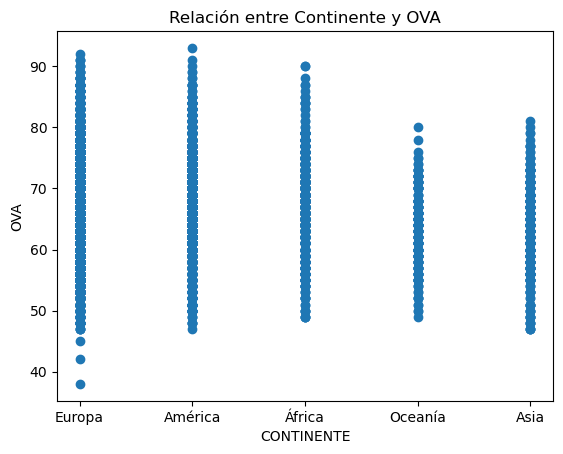

In [166]:
df_concat1= pd.concat([categorical_cont, numerical_filled], axis=1)
CONTINENTE = df_concat1['Continente']
ova = df_concat1['OVA']

# Graficar AGE vs OVA
plt.scatter(CONTINENTE, ova)
plt.xlabel('CONTINENTE')
plt.ylabel('OVA')
plt.title('Relación entre Continente y OVA')
plt.show()

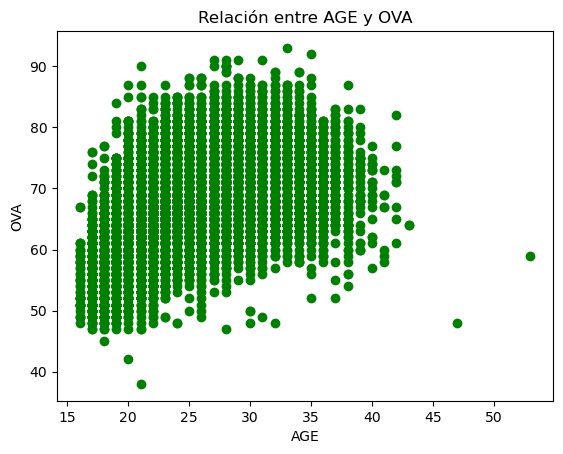

In [178]:
age = numerical_filled['Age']
ova = numerical_filled['OVA']

# Graficar AGE vs OVA
plt.scatter(age, ova, c='green')
plt.xlabel('AGE')
plt.ylabel('OVA')
plt.title('Relación entre AGE y OVA')
plt.show()

In [ ]:
# Quiero saber 

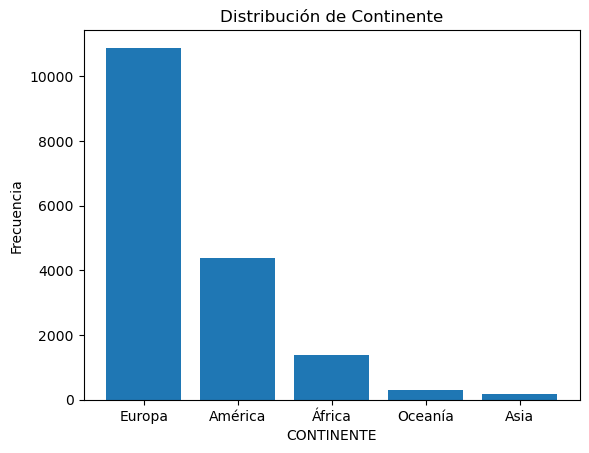

In [167]:
df_concat1 = pd.concat([categorical_cont, numerical_filled], axis=1)
CONTINENTE = df_concat1['Continente']
ova = df_concat1['OVA']

# Obtener los valores únicos de CONTINENTE y sus recuentos
continente_unique = CONTINENTE.unique()
continente_counts = CONTINENTE.value_counts()

# Graficar barras
plt.bar(continente_unique, continente_counts)
plt.xlabel('CONTINENTE')
plt.ylabel('Frecuencia')
plt.title('Distribución de Continente')
plt.show()

In [163]:
"""# GRAFICO TIPO SCATTER ORDENADO EN CUADRICULAS. 
import matplotlib.pyplot as plt

# Lista de todas las variables de habilidades
habilidades = ["Long Passing", "Ball Control", "Movement", "Acceleration", "Sprint Speed", "Agility",
               "Reactions", "Balance", "Power", "Shot Power", "Jumping", "Stamina", "Strength",
               "Long Shots", "Mentality", "Aggression", "Interceptions", "Positioning", "Vision",
               "Penalties", "Composure", "Defending", "Marking", "Standing Tackle", "Sliding Tackle",
               "Goalkeeping"]

# Configurar el tamaño y la cuadrícula de los subplots
fig, axs = plt.subplots(4, 6, figsize=(16, 12))
fig.tight_layout(pad=3.0)

# Crear un gráfico de dispersión para cada habilidad
for i, habilidad in enumerate(habilidades):
    row = i // 6
    col = i % 6
    axs[row, col].scatter(numerical_filled['Age'], numerical_filled[habilidad], alpha=0.5)
    axs[row, col].set_xlabel('Edad')
    axs[row, col].set_ylabel(habilidad)
    axs[row, col].set_title(f'Relación entre Edad y {habilidad}')

# Eliminar los subplots vacíos
for i in range(len(habilidades), 6 * 4):
    row = i // 6
    col = i % 6
    fig.delaxes(axs[row, col])

plt.show()"""

'# GRAFICO TIPO SCATTER ORDENADO EN CUADRICULAS. \nimport matplotlib.pyplot as plt\n\n# Lista de todas las variables de habilidades\nhabilidades = ["Long Passing", "Ball Control", "Movement", "Acceleration", "Sprint Speed", "Agility",\n               "Reactions", "Balance", "Power", "Shot Power", "Jumping", "Stamina", "Strength",\n               "Long Shots", "Mentality", "Aggression", "Interceptions", "Positioning", "Vision",\n               "Penalties", "Composure", "Defending", "Marking", "Standing Tackle", "Sliding Tackle",\n               "Goalkeeping"]\n\n# Configurar el tamaño y la cuadrícula de los subplots\nfig, axs = plt.subplots(4, 6, figsize=(16, 12))\nfig.tight_layout(pad=3.0)\n\n# Crear un gráfico de dispersión para cada habilidad\nfor i, habilidad in enumerate(habilidades):\n    row = i // 6\n    col = i % 6\n    axs[row, col].scatter(numerical_filled[\'Age\'], numerical_filled[habilidad], alpha=0.5)\n    axs[row, col].set_xlabel(\'Edad\')\n    axs[row, col].set_ylabel(h

In [ ]:
"""### GRAFICO SCATTER, PARA MIRAR LA DISTRIBUCIÓN DE LAS VARIABLES. 
import matplotlib.pyplot as plt

# Lista de todas las variables de habilidades
habilidades = ["Long Passing", "Ball Control", "Movement", "Acceleration", "Sprint Speed", "Agility",
               "Reactions", "Balance", "Power", "Shot Power", "Jumping", "Stamina", "Strength",
               "Long Shots", "Mentality", "Aggression", "Interceptions", "Positioning", "Vision",
               "Penalties", "Composure", "Defending", "Marking", "Standing Tackle", "Sliding Tackle",
               "Goalkeeping"]

# Crear un gráfico de dispersión para cada habilidad
for habilidad in habilidades:
    plt.scatter(numerical_filled['Age'], numerical_filled[habilidad], alpha=0.5)  
    plt.xlabel('Edad')
    plt.ylabel(habilidad)
    plt.title(f'Relación entre Edad y {habilidad}')
    plt.show()###"""